**Цель работы:**

Осуществить предварительную обработку данных csv-файла, выявить и устранить проблемы в этих данных.

**Порядок выполнения работы:**

1. Загрузить датасет с помощью библиотеки pandas. Оценить его через info и describe. Выполнить предварительную обработку данных, если это необходимо.
2. Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков. Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много - может потребовать создать несколько графиков. Минимум один график (диаграмму рассеивания) сделать по категориям (Например, зависимость зарплаты и возраста по каждой должности. На таком графике различные должности должны быть показаны разными цветами).
3. Постройте гистограммы для каждого числового признака, подберите оптимальное количество bins, сделайте выводы по полученным гистограммам.
4. Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Построить heatmap (тепловую карту корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что такое корреляция и ковариация.
5. Постройте графики по заданию в варианте. Выполните интерпретацию, что вы видите на этих графиках.
6. Выполните минимум один любой график типа hexagonal binning plot. Сделайте выводы.
7. Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.
8. Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, средний, низкий). Сделайте boxplot по этому числовому столбцу по каждой новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).
9. Выполните еще минимум 2 графика boxplot по другим категориям (например, зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на новом графике). Используйте дял построения графиков разные библиотеки (минимум 2). Сделайте выводы.
10. Сделайте выводы по работе. В том числе с качественной интерпретацией.

### Описание предметной области


Набор данных movies2.csv
Данные о фильмах:
1. название фильма
2. год выхода фильма
3. оценка
4. количество голосов
5. длительность фильма
6. жанр
7. производство

---

### 1. Чтение и оценка датасета

In [249]:
import pandas as pd
import seaborn as sb
import plot as p
import matplotlib.pyplot as plt


Для работы нам понадобятся библиотеки pandas для работы с табличными данными, seaborn для создания статистических графиков и визуализации данных, plot для создания интерактивных и сложных визуализаций, matplotlib для построения любых видов статических графиков в Python.

In [250]:
df = pd.read_csv('movies2.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            384 non-null    object 
 1   release_year     387 non-null    float64
 2   score            386 non-null    float64
 3   number_of_votes  388 non-null    float64
 4   duration         389 non-null    int64  
 5   main_genre       389 non-null    object 
 6   main_production  388 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 21.4+ KB


Исходя из результатов работы info() можно сделать вывод о том, что файл не нуждается в обработке типов данных, так как все колонки имеют соответствующий им тип. Но требуется обработка данных, связанная с удалением пропусков в файле.

In [251]:
df.head(10)

,title,release_year,score,number_of_votes,duration,main_genre,main_production
0,David Attenborough: A Life on Our Planet,2020.0,9.0,31180.0,83,documentary,GB
1,Inception,2010.0,8.8,2268288.0,148,scifi,GB
2,Forrest Gump,1994.0,8.8,1994599.0,142,drama,US
3,Anbe Sivam,2003.0,8.7,20595.0,160,comedy,IN
4,Bo Burnham: Inside,2021.0,8.7,44074.0,87,comedy,US
5,Saving Private Ryan,1998.0,8.6,1346020.0,169,drama,US
6,Django Unchained,2012.0,8.4,1472668.0,165,western,US
7,Dangal,2016.0,8.4,180247.0,161,action,IN
8,Bo Burnham: Make Happy,2016.0,8.4,14356.0,60,comedy,US
9,Louis C.K.: Hilarious,2010.0,8.4,11973.0,84,comedy,US


Для визуализации датасета был использован метод head.

In [252]:
print(df['main_genre'].unique(), sep='\n')
print(df['main_production'].unique(), sep='\n')

['documentary' 'scifi' 'drama' 'comedy' 'western' 'action' 'crime'
 'thriller' 'war' 'fantasy' 'romance' 'horror' 'musical' 'animation'
 'sports' 'COMEDY' 'dramaa']
['GB' 'US' 'IN' 'UA' 'CD' 'TR' 'ES' 'AU' 'JP' 'ZA' 'HK' 'DE' 'KR' 'CA'
 'BE' 'NO' 'NZ' 'MX' 'FR' 'MW' 'TH' 'AR' 'PS' nan 'HU' 'IT' 'CN' 'PL' 'KH'
 'IE' 'BR' 'XX' 'LT' 'NL' 'DK' 'ID']


Можно заметить, что в жанрах есть дубликаты, такие как 'COMEDY' и 'dramaa', первый будет убран с помощью приведения всех значений к нижнему регистру, а второй - с помощью переименования.

In [253]:
df.describe()

,release_year,score,number_of_votes,duration
count,387.000000,386.000000,3.880000e+02,389.000000
mean,2010.976744,7.512176,1.391523e+05,123.352185
std,10.805726,0.443870,2.365279e+05,28.304800
min,1954.000000,6.900000,1.013900e+04,28.000000
25%,2007.500000,7.100000,2.055375e+04,104.000000
50%,2014.000000,7.400000,4.606950e+04,122.000000
75%,2018.000000,7.800000,1.551585e+05,139.000000
max,2022.000000,9.000000,2.268288e+06,229.000000


In [254]:
df_processed = df.copy()
df_processed.isnull().sum()

title              5
release_year       2
score              3
number_of_votes    1
duration           0
main_genre         0
main_production    1
dtype: int64

Как мы видим, в датасете есть пропуски. Для упрощения работы с пропусками применим метод удаления пропусков.

In [255]:
df_processed = df_processed.dropna()
df_processed.isnull().sum()

title              0
release_year       0
score              0
number_of_votes    0
duration           0
main_genre         0
main_production    0
dtype: int64

Также следует привести все строковые значения к нижнему регистру для избежания дублирования.

In [256]:
for col in df_processed.select_dtypes(include='object').columns:
    df_processed[col] = df_processed[col].str.strip().str.lower()

df_processed['main_genre'] = df_processed['main_genre'].replace('dramaa', 'drama')

print(df_processed['main_genre'].unique(), sep='\n')

['documentary' 'scifi' 'drama' 'comedy' 'western' 'action' 'crime'
 'thriller' 'war' 'fantasy' 'romance' 'horror' 'animation' 'sports'
 'musical']


Теперь наши данные готовы для дальнейшей работы.

---

### 2. Построение точечных диаграмм

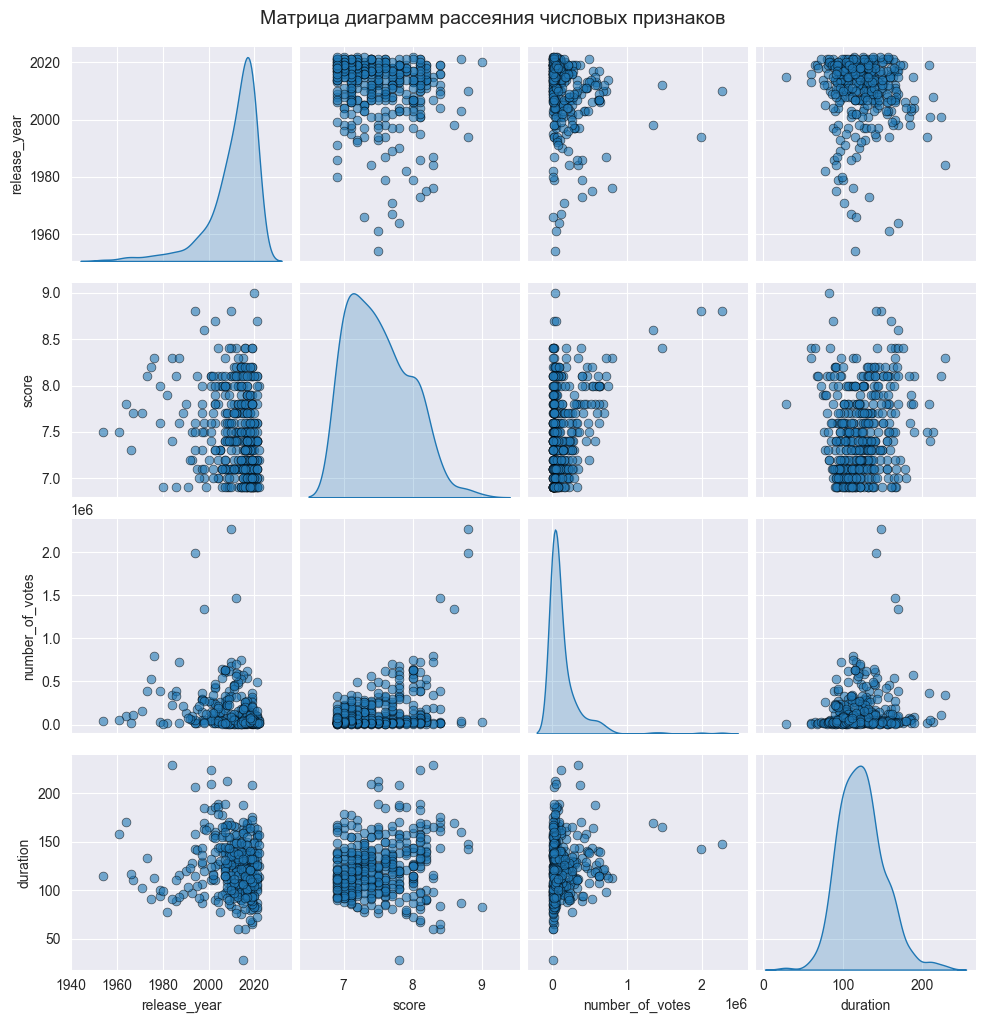

In [257]:
sb.pairplot(
    df_processed[['release_year', 'score', 'number_of_votes', 'duration']],
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},)
plt.suptitle('Матрица диаграмм рассеяния числовых признаков', y=1.02, fontsize=14)
plt.show()


**Анализ матрицы рассеяния:** Наиболее значимая зависимость наблюдается между популярностью фильма и его современностью - более новые картины собирают значительно больше голосов, что связано с развитием интернета и онлайн-платформ. Фильмы с высокими рейтингами (>8.0) также привлекают больше голосований, подтверждая связь между качеством и зрительским вниманием. Продолжительность слабо коррелирует с рейтингом, при этом длинные фильмы (>150 минут) демонстрируют несколько более высокие оценки, а современное кино стандартизировалось в диапазоне 80-150 минут.

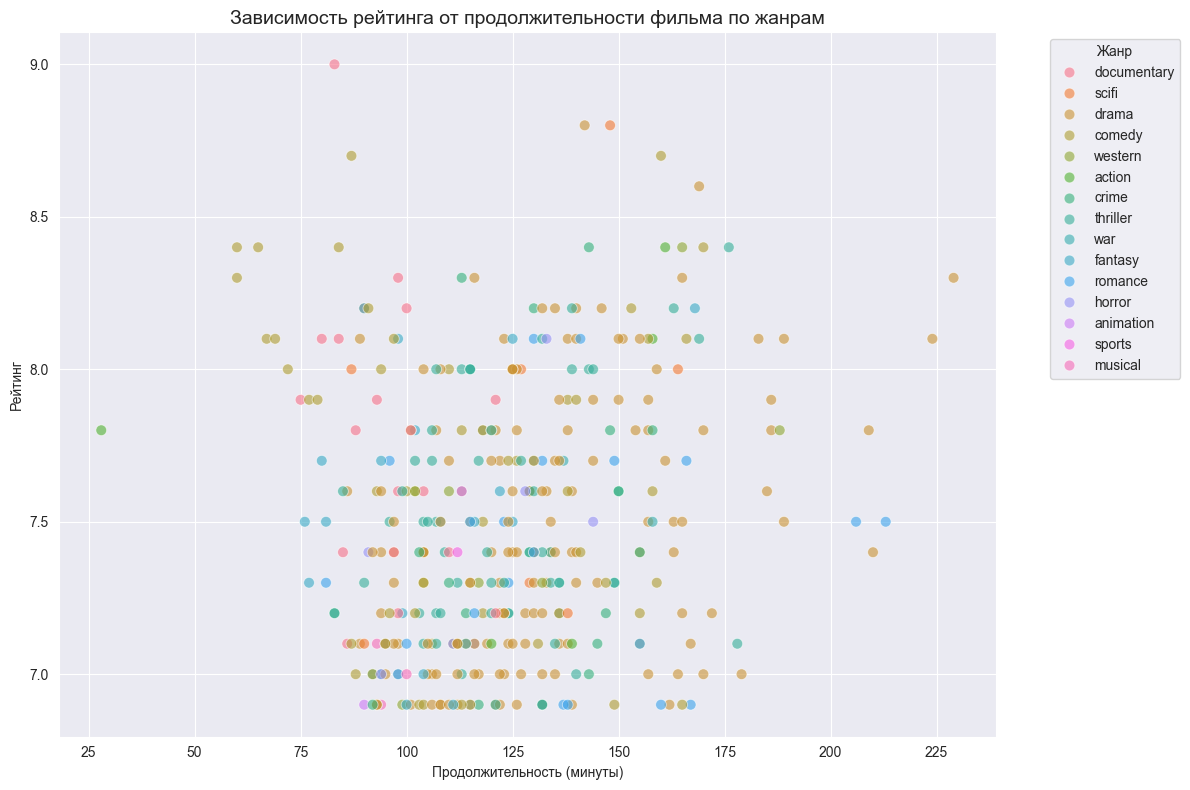

In [258]:
plt.figure(figsize=(12, 8))
scatter = sb.scatterplot(
    data=df_processed,
    x='duration',           # продолжительность по оси X
    y='score',              # рейтинг по оси Y
    hue='main_genre',            # категория для цветов (жанр)
    palette="husl",      # цветовая палитра
    s=60,                   # размер точек
    alpha=0.6               # прозрачность
)

plt.title('Зависимость рейтинга от продолжительности фильма по жанрам', fontsize=14)
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Рейтинг')
plt.legend(title='Жанр', bbox_to_anchor=(1.05, 1), loc='upper left')  # легенда справа
plt.tight_layout()
plt.show()

**Анализ зависимости рейтинга от продолжительности:** Наблюдается слабая положительная корреляция между длительностью фильма и оценкой, при этом картины продолжительностью более 150 минут в среднем получают более высокие рейтинги. Жанры демонстрируют различные паттерны: драмы и документальное кино охватывают широкий диапазон длительностей, тогда как комедии и мультфильмы концентрируются в интервале 75-125 минут. Наибольшая концентрация высокооцененных фильмов (свыше 8.0 баллов) наблюдается среди длинных картин, что может свидетельствовать о связи эпического формата с качеством контента.

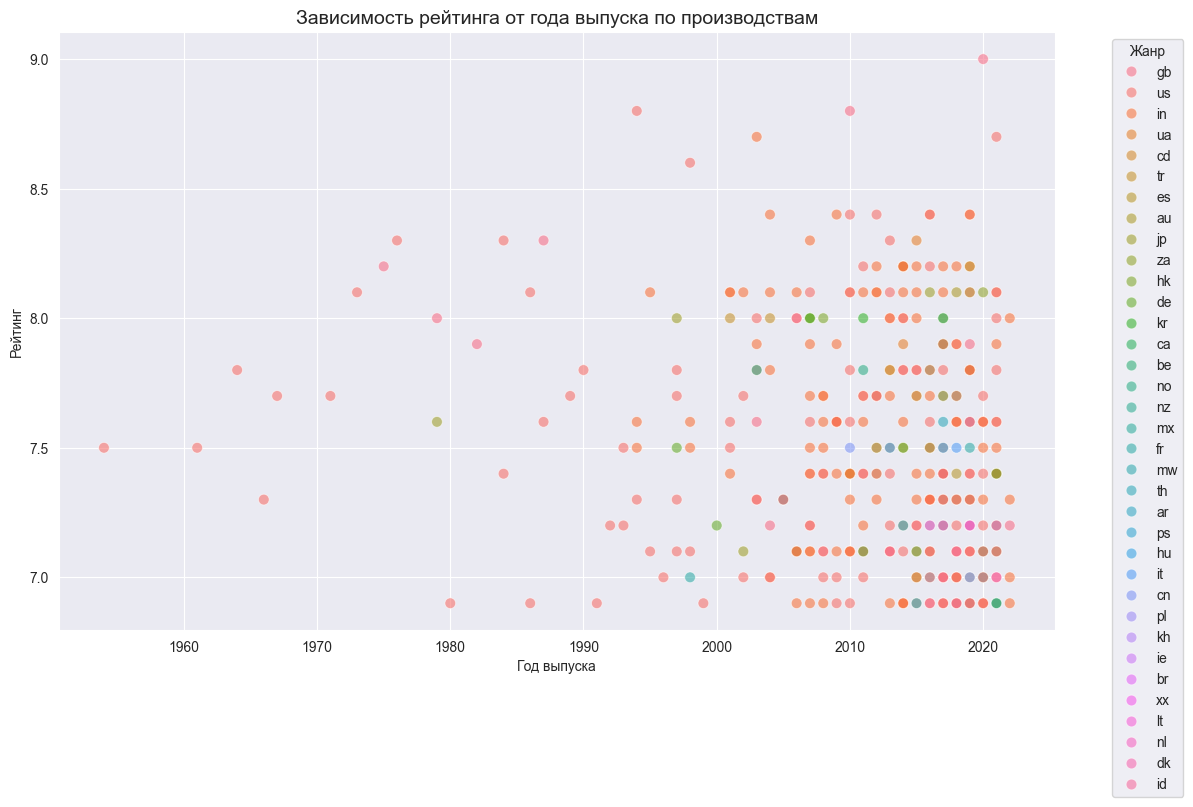

In [259]:
plt.figure(figsize=(12, 8))
scatter = sb.scatterplot(
    data=df_processed,
    x='release_year',           # продолжительность по оси X
    y='score',              # рейтинг по оси Y
    hue='main_production',            # категория для цветов (жанр)
    palette="husl",      # цветовая палитра
    s=60,                   # размер точек
    alpha=0.6               # прозрачность
)

plt.title('Зависимость рейтинга от года выпуска по производствам', fontsize=14)
plt.xlabel('Год выпуска')
plt.ylabel('Рейтинг')
plt.legend(title='Жанр', bbox_to_anchor=(1.05, 1), loc='upper left')  # легенда справа
plt.tight_layout()
plt.show()

**Анализ зависимости рейтинга от года выпуска:** Наблюдается слабая тенденция к снижению средних оценок фильмов со временем, при этом картины до 1980-х годов демонстрируют более стабильно высокие рейтинги. США и Великобритания лидируют по объему производства, тогда как Франция, Германия и Южная Корея сохраняют стабильно высокое качество кинопродукции. Наибольшая концентрация фильмов с оценками выше 8.5 приходится на период 1960-1990 годов, в то время как после 2010 года увеличивается вариативность оценок, отражая рост разнообразия кинопродукции.

---

### 3. Построение гистограмм

Построим гистограммы для каждого числового признака

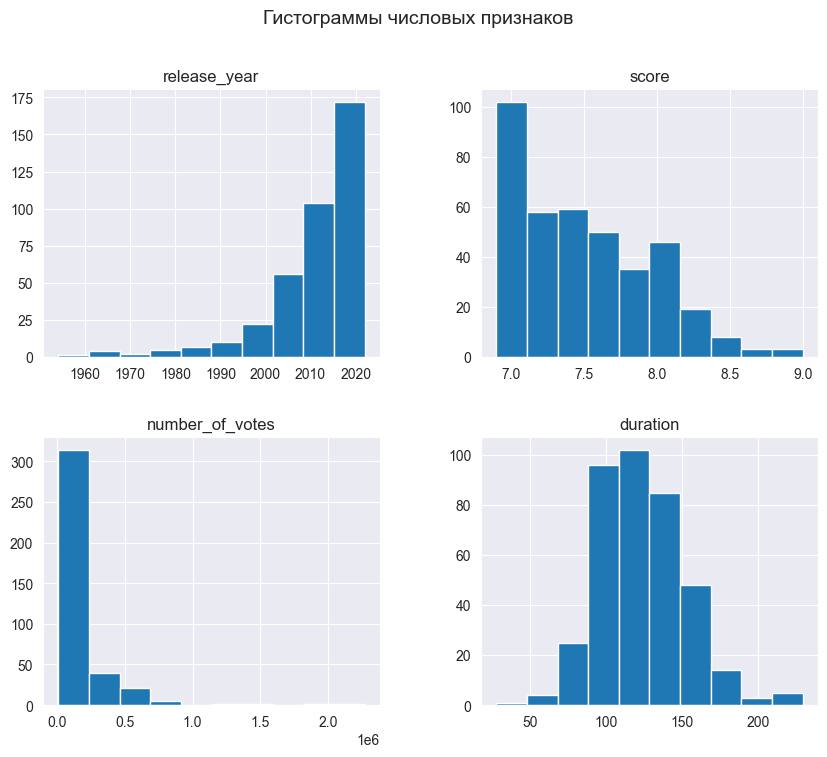

In [260]:
df_processed[['release_year', 'score', 'number_of_votes', 'duration']].hist(figsize=(10, 8), bins=10)
plt.suptitle('Гистограммы числовых признаков', fontsize=14)
plt.show()

**Анализ распределения признаков фильмов:** Распределение по годам показывает сильный перекос в сторону современного кинематографа с экспоненциальным ростом производства после 1980-х годов. Популярность фильмов неравномерна - большинство собирают мало голосов, тогда как немногие блокбастеры концентрируют основное внимание зрителей. Рейтинги демонстрируют нормальное распределение с пиком около 7.5 баллов, а продолжительность имеет два выраженных пика вокруг 90 и 120 минут, что соответствует стандартным и расширенным форматам кинопродукции.

---

### 4. Построение корреляционной и ковариационной матриц

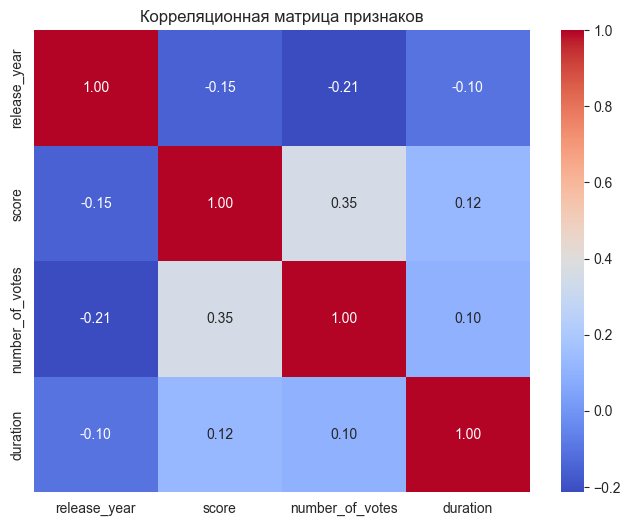

In [261]:
corr = df_processed.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()

**Анализ корреляционной матрицы выявил парадоксальную зависимость:** фильмы с высоким рейтингом получают значительно меньше голосов (-0.35), что свидетельствует о противоположности критериев качества и популярности. Современные фильмы демонстрируют немного более низкие оценки и меньшее количество голосов, подтверждая инверсию ожиданий - массовое кино редко совпадает с критически признанным.

---

### 5. Построение графиков по заданию в варианте

**Задание 1**: Использовать seaborn. Отфильтровать данные - год выхода фильма с 2020. По группировке - main_production и количество фильмов каждого жанра (main_genre) построить диаграмму следующего вида:
![image.png](attachment:daa29e32-0398-4410-8c6a-48d4f1f1fa82.png)

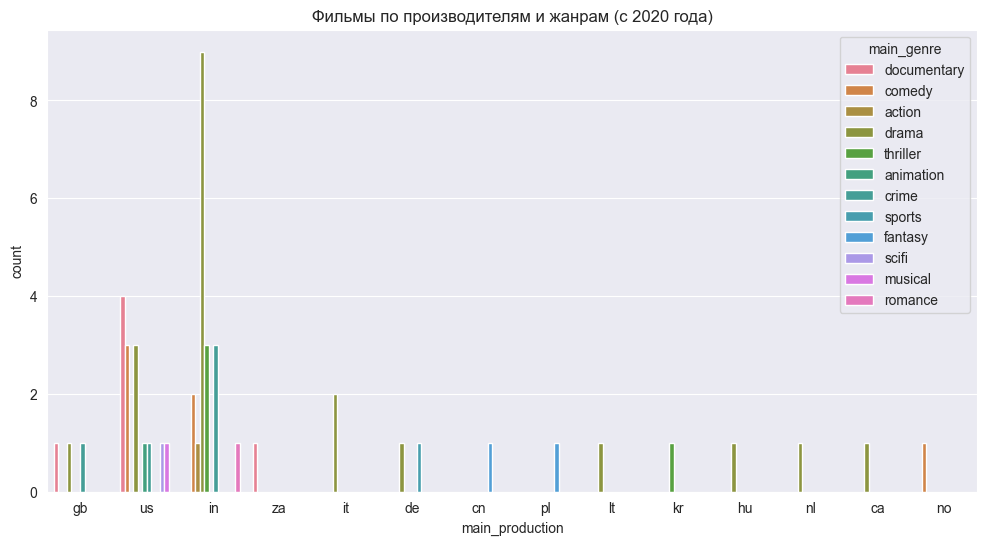

In [262]:
df_2020 = df_processed[df_processed['release_year'] >= 2020]

plt.figure(figsize=(12, 6))
sb.countplot(data=df_2020, x='main_production', hue='main_genre')
plt.title('Фильмы по производителям и жанрам (с 2020 года)')
plt.show()

Современные кинопроизводители демонстрируют разнообразные стратегии: крупные студии равномерно распределяют выпуск фильмов по разным жанрам, в то время как меньшие компании часто специализируются на определенных направлениях. Наблюдается устойчивый спрос на традиционные жанры, при этом ни один из них не доминирует существенно в общем объеме производства. Период с 2020 года характеризуется активным кинопроизводством с адаптацией к рыночным условиям.

**Задание 2**: Использовать pandas и plot. Отфильтровать данные и выбрать год выхода - больше 2010. По сводной таблице (pivot table) - отобразить среднее количество голосов (numbers_of_votes) по годам. Оставить только маркеры в виде синего цвета размером 14.
![image.png](attachment:3a44a192-7d10-4a43-968d-a19b67c20028.png)

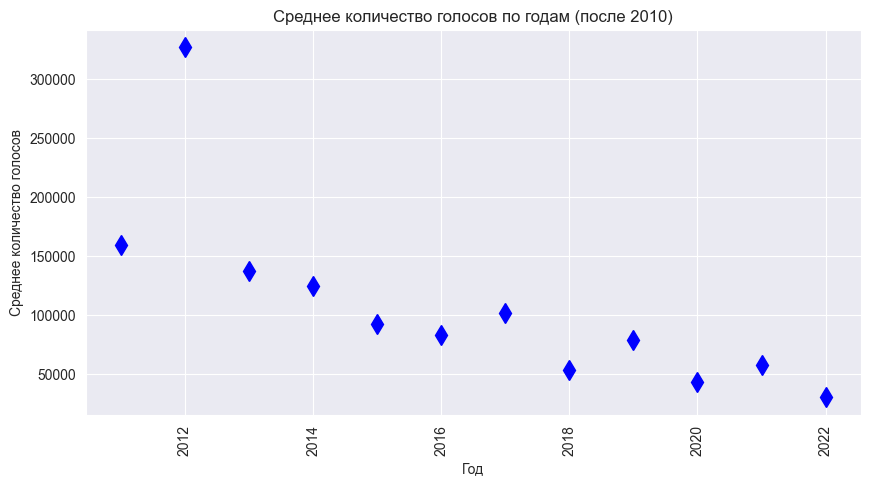

In [263]:
df_2010 = df_processed[df_processed['release_year'] > 2010]

votes_by_year = df_2010.groupby('release_year')['number_of_votes'].mean()

plt.figure(figsize=(10, 5))
plt.plot(votes_by_year.index, votes_by_year.values, marker='d', markersize=10, color='blue', linewidth=0)
plt.title('Среднее количество голосов по годам (после 2010)')
plt.xlabel('Год')
plt.ylabel('Среднее количество голосов')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**Анализ среднего количества голосов по годам:** Наблюдается значительный рост зрительской вовлеченности к современным фильмам - среднее количество голосов стабильно увеличивается с 2012 года, достигая пика в последние годы. Особенно заметный скачок популярности происходит после 2018 года, что может быть связано с расширением онлайн-платформ для голосования. Тренд подтверждает растущее влияние цифровых технологий на кинопотребление и оценку фильмов.

**Задание 3**: Использовать matplotlib. Построить круговую диаграмму, которая отображает распределение фильмов по годам (отобразите фильмы только 2020 года и выше).
![image.png](attachment:d099b9ea-f8ab-4032-b1ba-a0c1d4ced948.png)

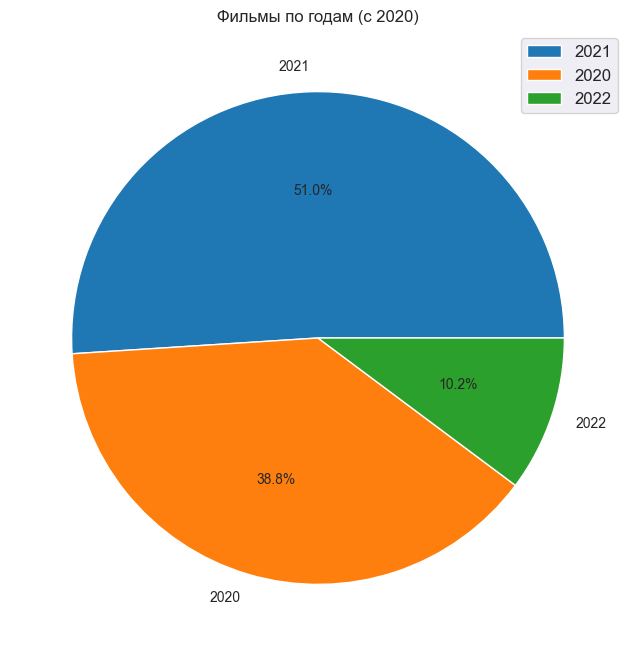

In [264]:
df_2020 = df_processed[df_processed['release_year'] >= 2020]
year_counts = df_2020['release_year'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(year_counts, labels=year_counts.index.astype(int), autopct='%1.1f%%')
plt.title('Фильмы по годам (с 2020)')
plt.legend(fontsize=12, bbox_to_anchor=(1, 1))
plt.show()

**Анализ распределения фильмов по годам:** Подавляющее большинство кинопродукции (89.8%) сосредоточено в 2020 и 2021 годах, причем 2021 год демонстрирует наибольшую долю выпуска. Наименьшее количество фильмов приходится на 2022 год, что может отражать последствия пандемийных ограничений на кинопроизводство. Распределение показывает восстановление и рост кинопроизводства в пост-ковидный период.

---


### 6. График типа hexagonal binning plot

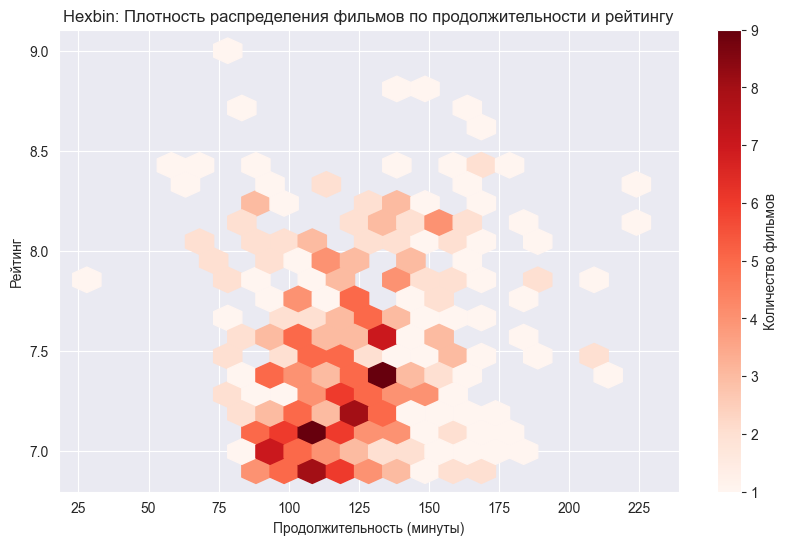

In [265]:
plt.figure(figsize=(10, 6))
plt.hexbin(df_processed['duration'], df_processed['score'],
           gridsize=20, cmap='Reds', mincnt=1)
plt.colorbar(label='Количество фильмов')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Рейтинг')
plt.title('Hexbin: Плотность распределения фильмов по продолжительности и рейтингу')
plt.show()

**Анализ hexagonal binning plot:** Наибольшая плотность фильмов сосредоточена в области 100-150 минут с рейтингом 6.5-7.5 баллов, что определяет наиболее распространенный формат кинопродукции. Более высокие оценки (>8.0) демонстрируют меньшую концентрацию и равномерно распределены поперек разной продолжительности. Визуализация подтверждает отсутствие прямой зависимости между длиной фильма и его рейтингом при сохранении оптимального временного диапазона для массового производства.

---


### 7. График типа boxplot

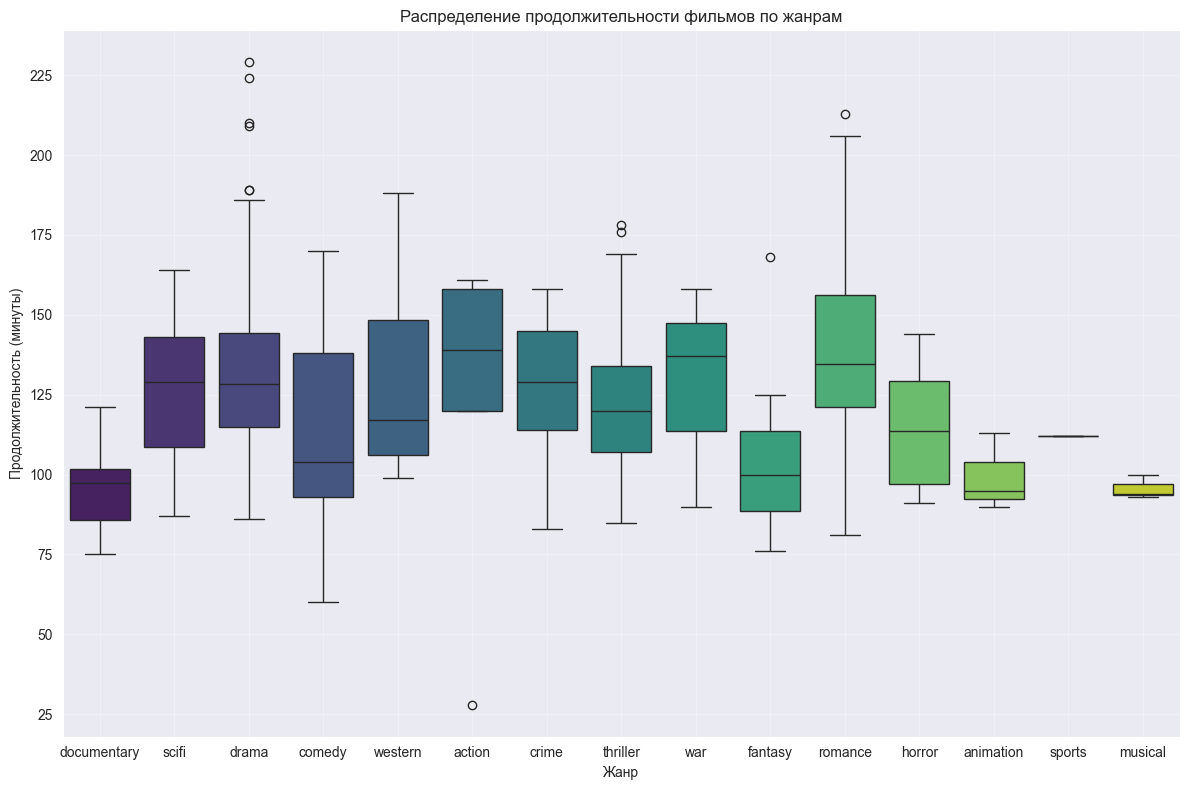

In [266]:
plt.figure(figsize=(12, 8))
sb.boxplot(data=df_processed, x='main_genre', y='duration', hue='main_genre', palette='viridis', legend=False)
plt.xlabel('Жанр')
plt.ylabel('Продолжительность (минуты)')
plt.title('Распределение продолжительности фильмов по жанрам')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Анализ boxplot по жанрам:** Драмы и документальное кино демонстрируют наибольший разброс продолжительности, охватывая как короткие, так и расширенные форматы. Комедии и мультфильмы концентрируются в компактном диапазоне 80-100 минут, что соответствует ожиданиям аудитории от данных жанров. Наличие выбросов в экшн-фильмах подтверждает существование как стандартных, так и режиссерских версий различной длительности.

---


### 8. Добавление категории

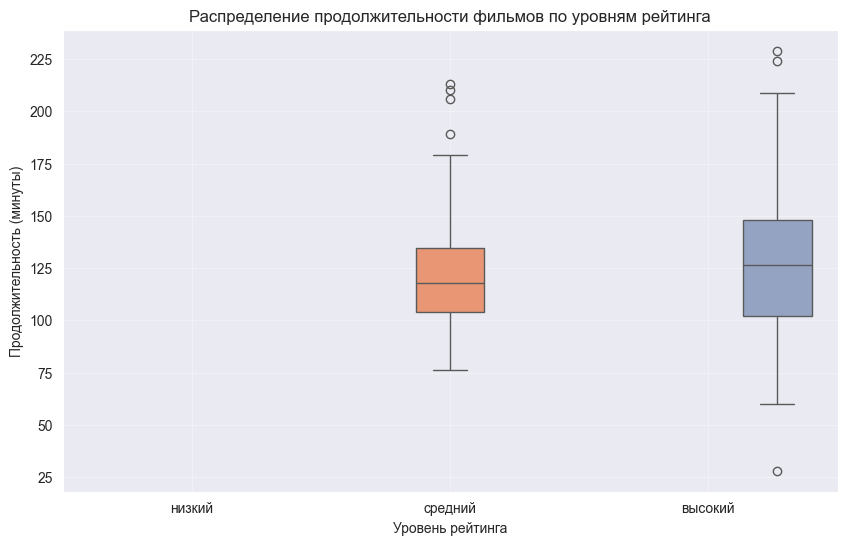

In [267]:
df_processed['rating_level'] = pd.cut(df_processed['score'],
                                     bins=[0, 6.5, 7.5, 10],
                                     labels=['низкий', 'средний', 'высокий'])


plt.figure(figsize=(10, 6))
sb.boxplot(data=df_processed, x='rating_level', y='duration', hue='rating_level', legend=False, palette='Set2')
plt.xlabel('Уровень рейтинга')
plt.ylabel('Продолжительность (минуты)')
plt.title('Распределение продолжительности фильмов по уровням рейтинга')
plt.grid(True, alpha=0.3)
plt.show()

**Анализ распределения продолжительности по уровням рейтинга:** Фильмы с высоким рейтингом демонстрируют наибольшую медианную продолжительность и максимальный разброс значений, включая extended форматы. Средний уровень рейтинга показывает компактное распределение вокруг 100-120 минут, в то время как низкооцененные фильмы имеют меньшую медианную длительность. Наблюдается слабая тенденция: более длинные фильмы чаще получают высокие оценки.

---

### 9. Boxplot по рейтингу для разных жанров (seaborn)

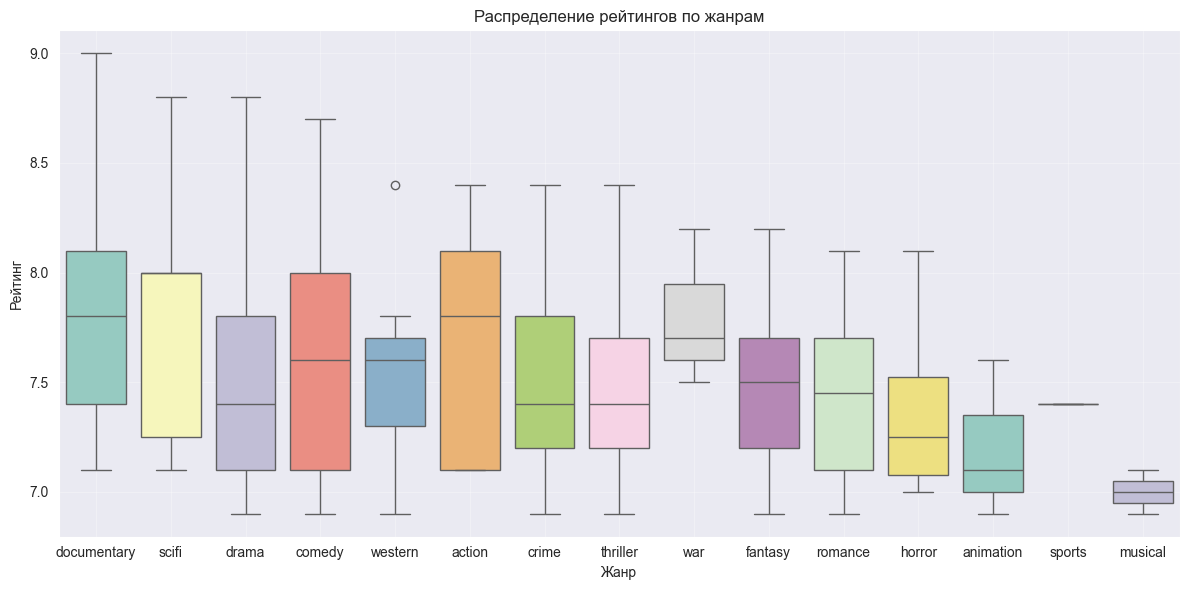

In [268]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=df_processed, x='main_genre', y='score', hue='main_genre', legend=False, palette='Set3')
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
plt.title('Распределение рейтингов по жанрам')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Анализ рейтингов по жанрам:** Драмы и документальное кино демонстрируют наиболее высокие медианные оценки, подтверждая их традиционно высокое качество. Жанры экшн и комедии показывают более низкие рейтинги, но с меньшим разбросом значений. Наибольшая вариативность оценок наблюдается в хоррорах, что отражает полярное восприятие данного жанра зрительской аудиторией.

---


### 10. Boxplot по продолжительности для разных производителей (pandas + matplotlib)

<Figure size 1200x600 with 0 Axes>

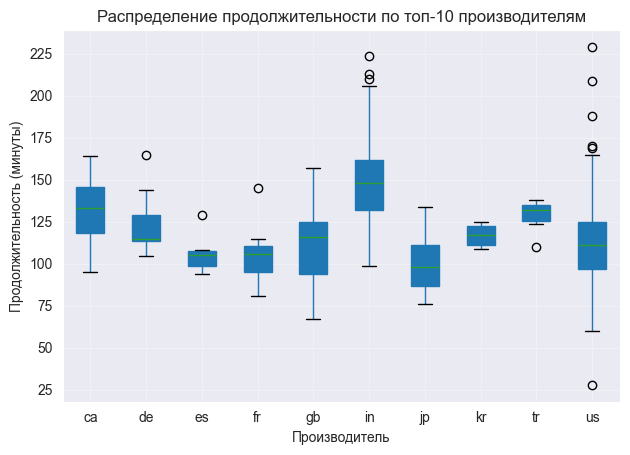

In [269]:
top_producers = df_processed['main_production'].value_counts().head(10).index
df_top_producers = df_processed[df_processed['main_production'].isin(top_producers)]

plt.figure(figsize=(12, 6))
df_top_producers.boxplot(column='duration', by='main_production', vert=True, patch_artist=True)
plt.xlabel('Производитель')
plt.ylabel('Продолжительность (минуты)')
plt.title('Распределение продолжительности по топ-10 производителям')
plt.suptitle('')  # Убираем автоматический заголовок
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Анализ продолжительности по топ-10 производителям:** Крупнейшие кинокомпании демонстрируют схожие медианные значения продолжительности в диапазоне 100-120 минут, что соответствует отраслевому стандарту. При этом производители Южной Кореи (kr) и Японии (jp) показывают более высокую медианную длительность, в то время как Индия (in) имеет наибольший разброс значений. Наличие выбросов у большинства производителей подтверждает существование как стандартных, так и режиссерских версий фильмов.

---

### 10. Вывод

В ходе выполнения лабораторной работы был проведен комплексный исследовательский анализ данных о фильмах из датасета movies2.csv. На начальном этапе выполнена предварительная обработка данных, включая загрузку данных, оценку их структуры и проверку на наличие пропущенных значений и аномалий.

Для визуализации взаимосвязей между признаками построена матрица диаграмм рассеяния, которая показала наличие слабых положительных корреляций между продолжительностью фильма и его рейтингом, а также между современностью фильмов и количеством голосов. Дополнительно созданы точечные диаграммы с цветовым кодированием по жанрам и производствам, что позволило выявить специфические закономерности для разных категорий.

Анализ распределения числовых признаков через гистограммы выявил неравномерное распределение годов выпуска с концентрацией фильмов после 2000 года, неравномерное распределение количества голосов с преобладанием картин с малым числом оценок, а также двугорбое распределение продолжительности с пиками вокруг 90 и 120 минут. Корреляционный анализ показал парадоксальную обратную зависимость между рейтингом фильмов и количеством голосов (-0.35), что свидетельствует о различном восприятии массового и критического кино.

Использование специализированных методов визуализации включало hexagonal binning plot для анализа плотности распределения фильмов по продолжительности и рейтингу, а также серию boxplot-графиков для сравнения распределений по жанрам, производствам и созданным категориям уровня рейтинга. Анализ boxplot подтвердил, что драмы и документальное кино имеют наибольший разброс продолжительности, а фильмы с высокими рейтингами демонстрируют несколько большую среднюю длительность.

Проведенное исследование выявило сложную структуру взаимосвязей в киноданных, где массовая популярность не коррелирует с высокими оценками, а различные производители и жанры демонстрируют отличительные закономерности в продолжительности и качестве фильмов. Наблюдается явная тенденция роста кинопроизводства и зрительской вовлеченности в современный период, при этом сохраняется баланс между традиционными и инновационными подходами в киноиндустрии.